In [33]:
from main import DataFramePreprocessor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

dfp = DataFramePreprocessor()
reg = linear_model.LinearRegression()


In [34]:
df = dfp.summarize_player_statistics(element_type=3)
df.index

Index(['Salah', 'Saka', 'Son', 'Foden', 'Palmer', 'Bowen', 'Douglas Luiz',
       'Gordon', 'Gross', 'Ward-Prowse',
       ...
       'King', 'Pearson', 'Fabinho', 'Knockaert', 'Kozłowski', 'Orford',
       'Onyedinma', 'Charles', 'Chiquinho', 'Nyoni'],
      dtype='object', name='web_name', length=351)

In [35]:
# var = ['minutes', 'shots', 'SoT', 'SiB', 'xG', 'npxG', 'G', 'npG',
#             'key_passes', 'xA', 'A', 'xGC', 'GC', 'xCS', 'CS', 'xGI', 'npxGI', 'xP'
#             , 'PvsxP', 'pos_touches', 'Att Pen',
#             'carries_final_third', 'carries_penalty_area']
var = ['minutes', 'G', 'A']

Y = df[var]
X = df['total_points'].values.reshape(-1, 1)
y = np.arange(0, len(var))

reg.fit(X, Y)

LinearRegression()

In [36]:

for col_num in y:
    reg.fit(X, Y.iloc[:, col_num])
    print('설명변수명 : {}'.format(Y.columns[col_num]))
    print('회귀계수:', reg.coef_)
    print('절편:', reg.intercept_)
    print('결정계수 : {:.3f}'.format(reg.score(X, Y.iloc[:, col_num])))
    print('')

설명변수명 : minutes
회귀계수: [18.26391082]
절편: 85.95617289442464
결정계수 : 0.819

설명변수명 : G
회귀계수: [0.06065338]
절편: -0.39276859411483733
결정계수 : 0.794

설명변수명 : A
회귀계수: [0.04012486]
절편: -0.16534074993541514
결정계수 : 0.669



In [37]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


Y = pd.DataFrame(df, columns=['total_points'])
Y.fillna(0, inplace=True)
X = df[var]


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.5, random_state=0)

# 데이터 표준화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

full_model = sm.OLS(y_train, X_train_scaled)
fitted_full_model = full_model.fit()
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           total_points   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.586
Method:                 Least Squares   F-statistic:                              83.63
Date:                Fri, 16 Feb 2024   Prob (F-statistic):                    2.04e-33
Time:                        20:24:48   Log-Likelihood:                         -828.77
No. Observations:                 175   AIC:                                      1664.
Df Residuals:                     172   BIC:                                      1673.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            16.0448      2.983      5.379      0.000      10.157      21.933
x2            15.3272      3.128      4.900      0.000       9.153      21.501
x3             6.1596      3.287      1.874      0.063      -0.329      12.648
==============================================================================
Omnibus:                       21.194   Durbin-Watson:                   0.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.935
Skew:                           0.708   Prob(JB):                     3.16e-07
Kurtosis:                       4.449   Cond. No.                         2.89
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

scaled_df = df[var]
scaled_df[var] = scaler.fit_transform(df[var])

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]
vif['features'] = scaled_df.columns
vif

/var/folders/2l/dp_ymfg51ylbd7mxz4hb_2wh0000gn/T/ipykernel_37830/3579230553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df[var] = scaler.fit_transform(df[var])


,VIF Factor,features
0,2.177746,minutes
1,2.154238,G
2,2.214234,A


In [39]:
X2 = pd.DataFrame(scaled_df, columns = var)

X2.corr()

,minutes,G,A
minutes,1.000000,0.667067,0.678246
G,0.667067,1.000000,0.673888
A,0.678246,0.673888,1.000000


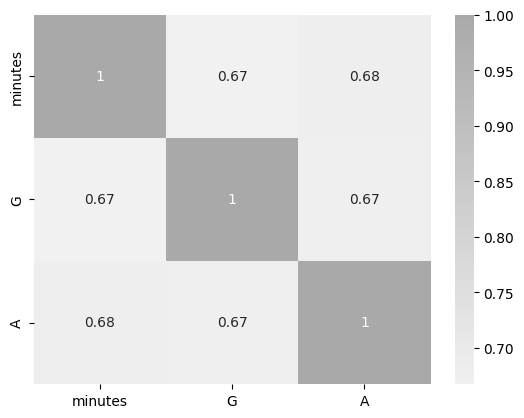

In [40]:
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(X2.corr(), annot=True, cmap=cmap)
plt.show()